In [1]:
import pandas as pd
import numpy as np
import os
import wranglerer as wr
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["font.size"] = 10
from sklearn.model_selection import train_test_split

In [2]:
df_raw = pd.read_csv('nba.csv')

In [3]:
df_raw.head()

,team,fg_pct,opp_fg_pct,three_pt_pct,opp_three_pt_pct,ft_pct,rebounds,opp_rebounds,assists,steals,opp_steals,trnovrs_commited,pts,opp_pts,opp_fouls,prev_season,playoffs
0,Atlanta Hawks*,0.464,0.458,0.173,0.251,0.771,46.3,44.2,23.5,9.6,8.4,18.3,105.2,102.3,26.6,1,1
1,Boston Celtics*,0.490,0.470,0.384,0.286,0.779,43.3,40.7,25.9,9.5,8.1,18.1,109.4,101.9,24.2,0,1
2,Chicago Bulls,0.484,0.496,0.255,0.271,0.779,42.4,41.5,25.5,8.3,10.0,19.9,104.3,107.0,26.1,0,0
3,Cleveland Cavaliers,0.474,0.501,0.193,0.291,0.772,42.0,44.1,24.0,8.7,8.1,15.6,106.7,106.4,23.2,0,0
4,Denver Nuggets,0.463,0.492,0.325,0.327,0.737,44.7,44.1,24.2,8.7,9.5,17.9,103.4,107.6,23.7,1,0


In [4]:
df_raw.team[0]

'Atlanta Hawks*'

In [5]:
df_raw['team'] = df_raw.team.str.replace('*','')

/var/folders/ty/2pnn6wsj06n_glzjgbmxzlkw0000gn/T/ipykernel_1306/728178884.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_raw['team'] = df_raw.team.str.replace('*','')


In [6]:
df_raw.head()

,team,fg_pct,opp_fg_pct,three_pt_pct,opp_three_pt_pct,ft_pct,rebounds,opp_rebounds,assists,steals,opp_steals,trnovrs_commited,pts,opp_pts,opp_fouls,prev_season,playoffs
0,Atlanta Hawks,0.464,0.458,0.173,0.251,0.771,46.3,44.2,23.5,9.6,8.4,18.3,105.2,102.3,26.6,1,1
1,Boston Celtics,0.490,0.470,0.384,0.286,0.779,43.3,40.7,25.9,9.5,8.1,18.1,109.4,101.9,24.2,0,1
2,Chicago Bulls,0.484,0.496,0.255,0.271,0.779,42.4,41.5,25.5,8.3,10.0,19.9,104.3,107.0,26.1,0,0
3,Cleveland Cavaliers,0.474,0.501,0.193,0.291,0.772,42.0,44.1,24.0,8.7,8.1,15.6,106.7,106.4,23.2,0,0
4,Denver Nuggets,0.463,0.492,0.325,0.327,0.737,44.7,44.1,24.2,8.7,9.5,17.9,103.4,107.6,23.7,1,0


In [7]:
df = df_sans_teams = df_raw.drop(columns='team')

In [8]:
df

,fg_pct,opp_fg_pct,three_pt_pct,opp_three_pt_pct,ft_pct,rebounds,opp_rebounds,assists,steals,opp_steals,trnovrs_commited,pts,opp_pts,opp_fouls,prev_season,playoffs
0,0.464,0.458,0.173,0.251,0.771,46.3,44.2,23.5,9.6,8.4,18.3,105.2,102.3,26.6,1,1
1,0.490,0.470,0.384,0.286,0.779,43.3,40.7,25.9,9.5,8.1,18.1,109.4,101.9,24.2,0,1
2,0.484,0.496,0.255,0.271,0.779,42.4,41.5,25.5,8.3,10.0,19.9,104.3,107.0,26.1,0,0
3,0.474,0.501,0.193,0.291,0.772,42.0,44.1,24.0,8.7,8.1,15.6,106.7,106.4,23.2,0,0
4,0.463,0.492,0.325,0.327,0.737,44.7,44.1,24.2,8.7,9.5,17.9,103.4,107.6,23.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,0.494,0.492,0.369,0.373,0.790,42.0,41.7,27.0,6.9,7.2,13.3,119.4,116.8,20.6,0,1
1220,0.465,0.507,0.345,0.391,0.743,42.6,43.9,26.5,6.8,7.9,14.9,110.2,120.0,18.0,0,0
1221,0.459,0.491,0.335,0.374,0.784,44.0,43.3,24.5,9.6,6.1,11.9,115.5,114.0,20.0,1,1
1222,0.473,0.473,0.353,0.361,0.786,45.4,43.0,25.7,6.0,7.7,15.2,115.8,116.7,20.2,1,0


In [9]:
#wr.summarize(df)

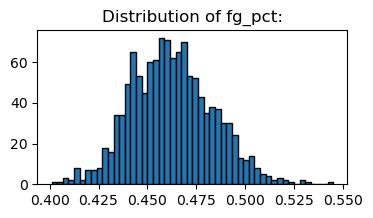

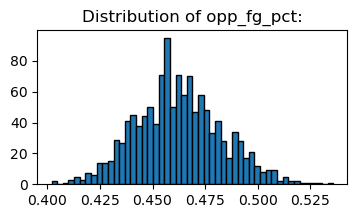

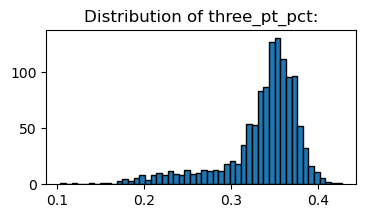

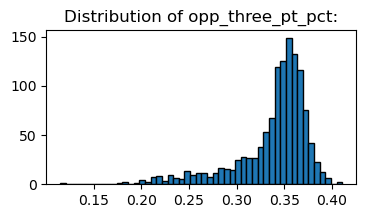

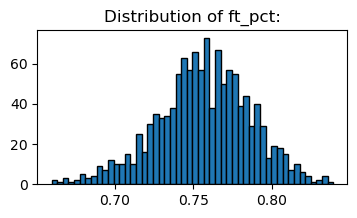

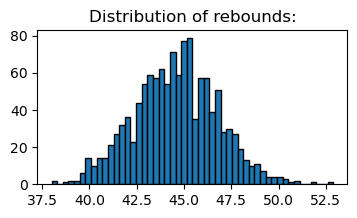

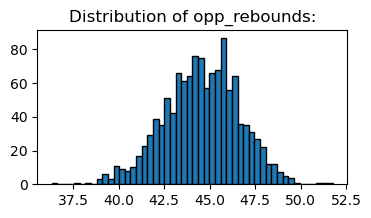

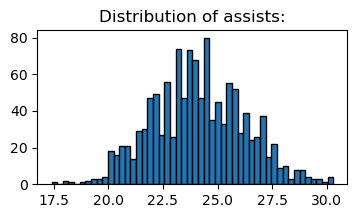

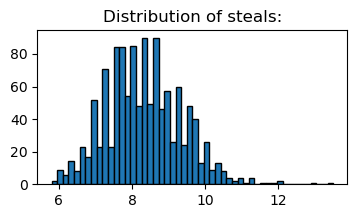

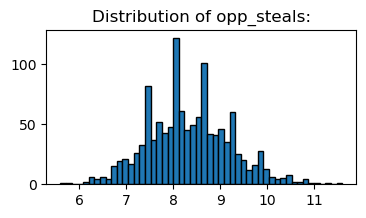

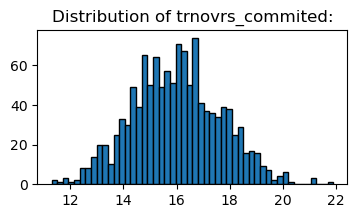

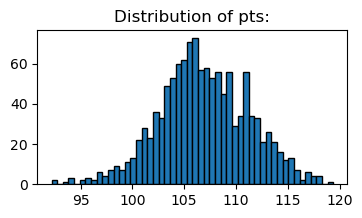

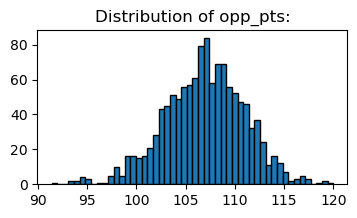

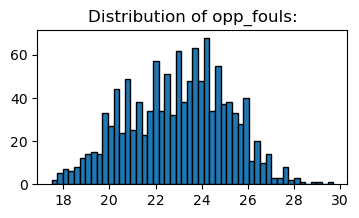

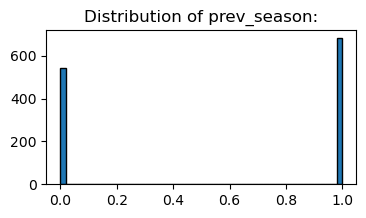

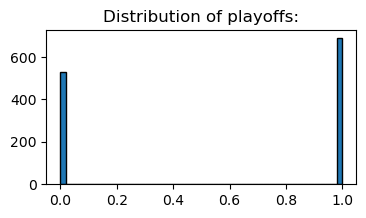

In [10]:
wr.get_hist_better(df)

In [11]:
wr.get_upper_outliers(df.opp_steals).sort_values(ascending=False).head(12)

512    0.9
219    0.6
478    0.3
350    0.2
507    0.1
217    0.1
430    0.1
349    0.1
813    0.0
812    0.0
811    0.0
820    0.0
Name: opp_steals, dtype: float64

In [12]:
wr.get_lower_outliers(df.pts,k=1.5).sort_values(ascending=False).head(9)

601    3.2
483    3.0
776    1.8
787    1.5
781    1.2
512    1.2
785    0.3
866    0.2
814    0.0
Name: pts, dtype: float64

In [13]:
df.pts.sort_values().head(9)

601    92.2
483    92.4
776    93.6
787    93.9
781    94.2
512    94.2
785    95.1
866    95.2
976    95.5
Name: pts, dtype: float64

In [14]:
train, validate, test = wr.split_data(df)

In [15]:
train.shape, validate.shape, test.shape

((732, 16), (271, 16), (221, 16))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fg_pct            1224 non-null   float64
 1   opp_fg_pct        1224 non-null   float64
 2   three_pt_pct      1224 non-null   float64
 3   opp_three_pt_pct  1224 non-null   float64
 4   ft_pct            1224 non-null   float64
 5   rebounds          1224 non-null   float64
 6   opp_rebounds      1224 non-null   float64
 7   assists           1224 non-null   float64
 8   steals            1224 non-null   float64
 9   opp_steals        1224 non-null   float64
 10  trnovrs_commited  1224 non-null   float64
 11  pts               1224 non-null   float64
 12  opp_pts           1224 non-null   float64
 13  opp_fouls         1224 non-null   float64
 14  prev_season       1224 non-null   int64  
 15  playoffs          1224 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 153

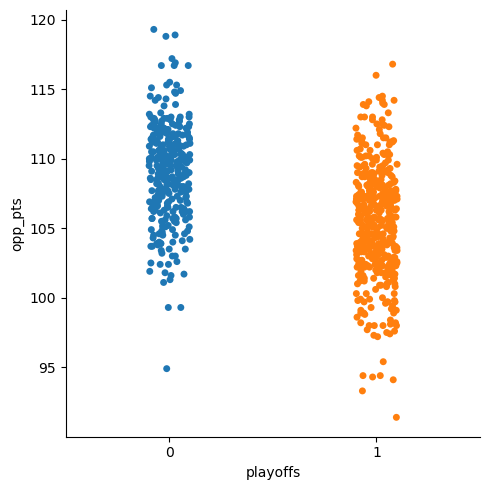

In [34]:
sns.catplot(data=train, x='playoffs', y='opp_pts')

In [36]:
train.columns

Index(['fg_pct', 'opp_fg_pct', 'three_pt_pct', 'opp_three_pt_pct', 'ft_pct',
       'rebounds', 'opp_rebounds', 'assists', 'steals', 'opp_steals',
       'trnovrs_commited', 'pts', 'opp_pts', 'opp_fouls', 'prev_season',
       'playoffs'],
      dtype='object')

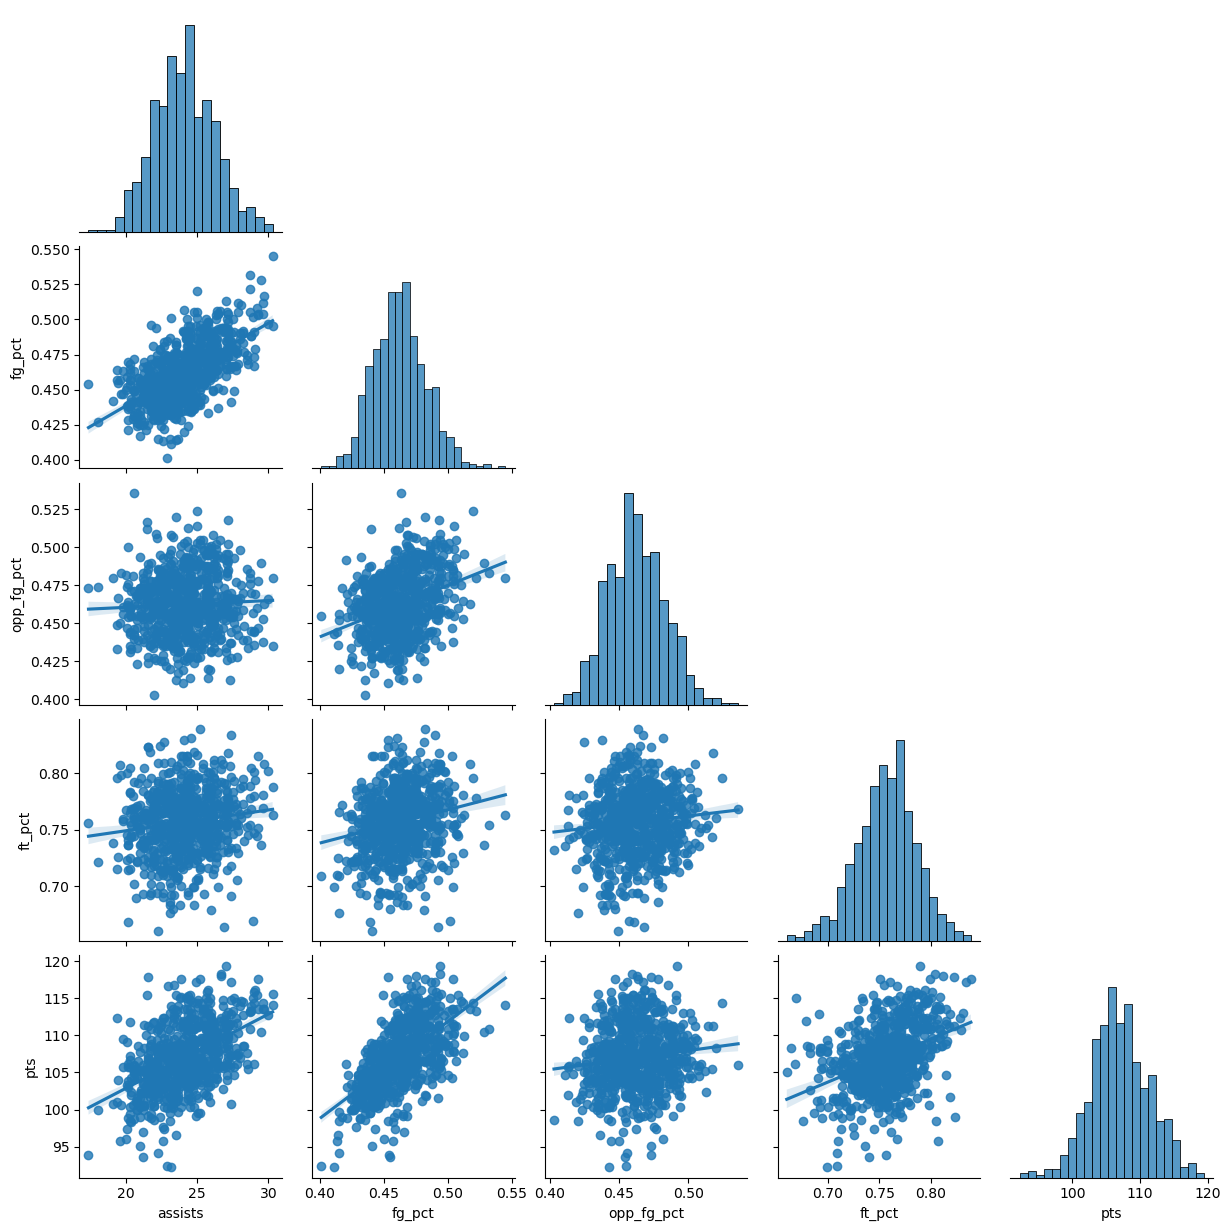

In [38]:
cols = ['assists','fg_pct','opp_fg_pct','ft_pct', 'pts',]
sns.pairplot(train[cols], corner=True,kind='reg')
plt.show()

In [39]:
df_mean_by_playoffs = train.groupby(by='playoffs').mean()

In [40]:
df_mean_by_playoffs

,fg_pct,opp_fg_pct,three_pt_pct,opp_three_pt_pct,ft_pct,rebounds,opp_rebounds,assists,steals,opp_steals,trnovrs_commited,pts,opp_pts,opp_fouls,prev_season
playoffs,,,,,,,,,,,,,,,
0,0.452672,0.469608,0.334898,0.347860,0.751404,44.038854,45.357962,23.221975,8.104777,8.474204,16.217834,104.837261,108.976752,22.505732,0.305732
1,0.470160,0.456940,0.337084,0.332584,0.760400,44.830144,44.026077,24.810048,8.523684,8.174402,15.776316,108.600718,105.400239,23.288995,0.729665
